In [143]:
import pandas as pd


In [144]:
data = pd.read_csv("/Users/dinurinijai/Downloads/archive (4)/heart_statlog_cleveland_hungary_final.csv")

In [145]:
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [146]:
data.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [147]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1185    False
1186    False
1187    False
1188    False
1189    False
Length: 1190, dtype: bool

In [148]:
import numpy as np
import matplotlib.pyplot as plt



In [149]:
data.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

EDA

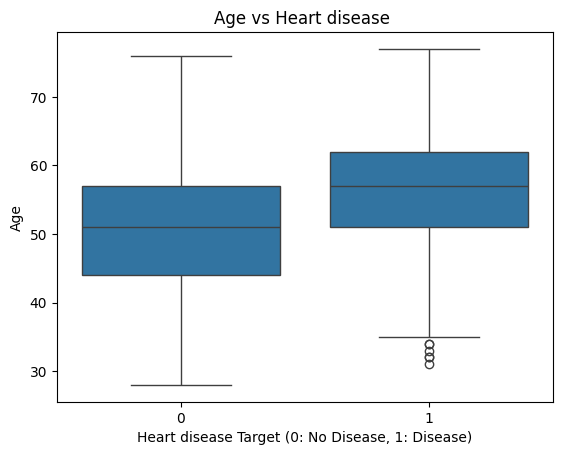

In [150]:
#Age vs heart disease
import seaborn as sns
ax = sns.boxplot(x=data['target'],y=data['age'],data=data)
ax.set_title("Age vs Heart disease ")
ax.set_ylabel("Age")
ax.set_xlabel("Heart disease Target (0: No Disease, 1: Disease)")
plt.show()

Text(0, 0.5, 'Count')

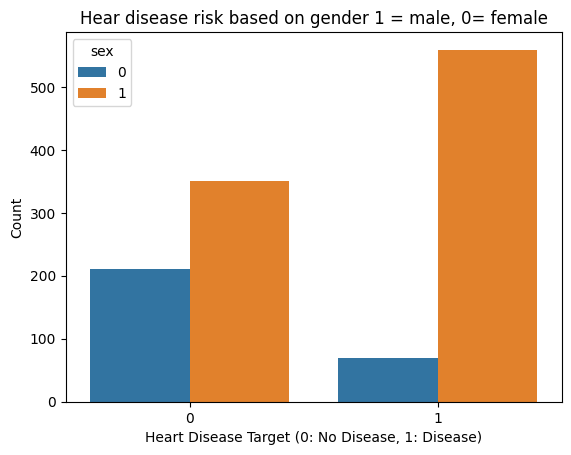

In [151]:
ax=sns.countplot(x="target",hue="sex",data=data)
ax.set_title ("Hear disease risk based on gender 1 = male, 0= female")
ax.set_xlabel("Heart Disease Target (0: No Disease, 1: Disease)")
ax.set_ylabel("Count")

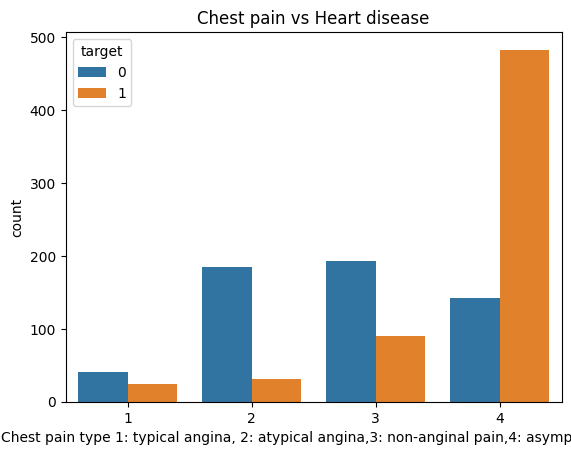

In [152]:
#chest pain type vs target
ax = sns.countplot(x='chest pain type', hue='target' ,data=data)
ax.set_title("Chest pain vs Heart disease")
ax.set_ylabel("count")
ax.set_xlabel("Chest pain type 1: typical angina, 2: atypical angina,3: non-anginal pain,4: asymptomatic")
plt.show()

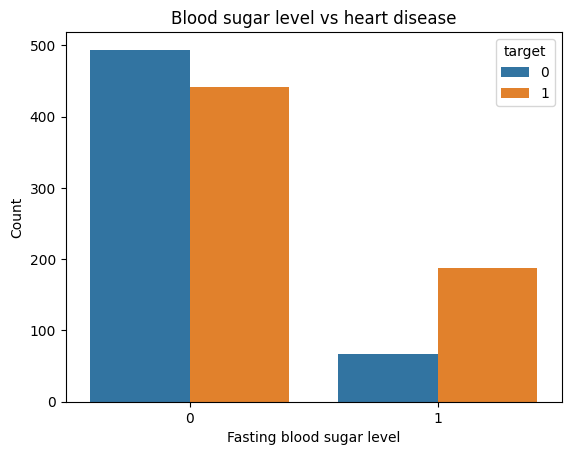

In [153]:
#fasting blood sugar level vs heart disease
ax = sns.countplot(x="fasting blood sugar", hue='target',data=data)
ax.set_title("Blood sugar level vs heart disease")
ax.set_xlabel("Fasting blood sugar level")
ax.set_ylabel("Count")
plt.show()


/var/folders/qs/k1sbcnk12gnb7sv20gvwpgyr0000gn/T/ipykernel_77689/3492934196.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Heart Disease')


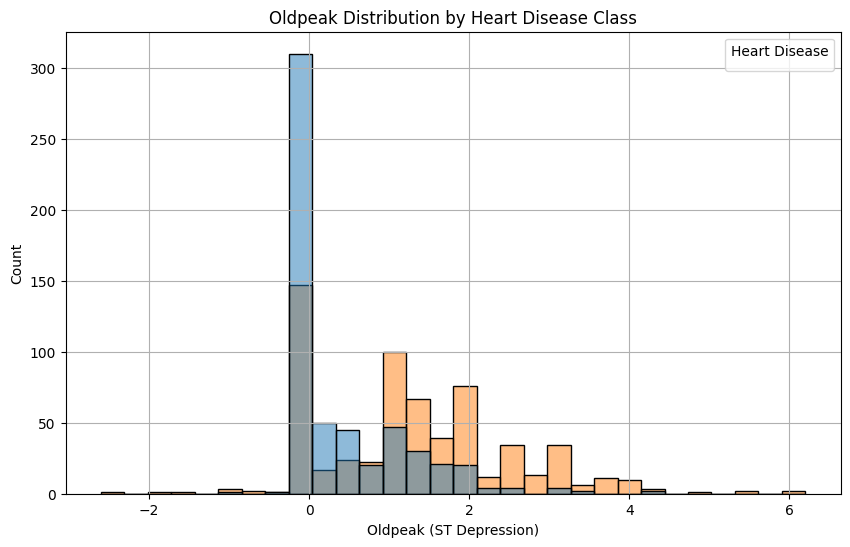

In [154]:
#Oldpeak Distribution by Heart Disease Class
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='oldpeak', hue='target')

plt.title('Oldpeak Distribution by Heart Disease Class')
plt.xlabel('Oldpeak (ST Depression)')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.grid(True)
plt.show()


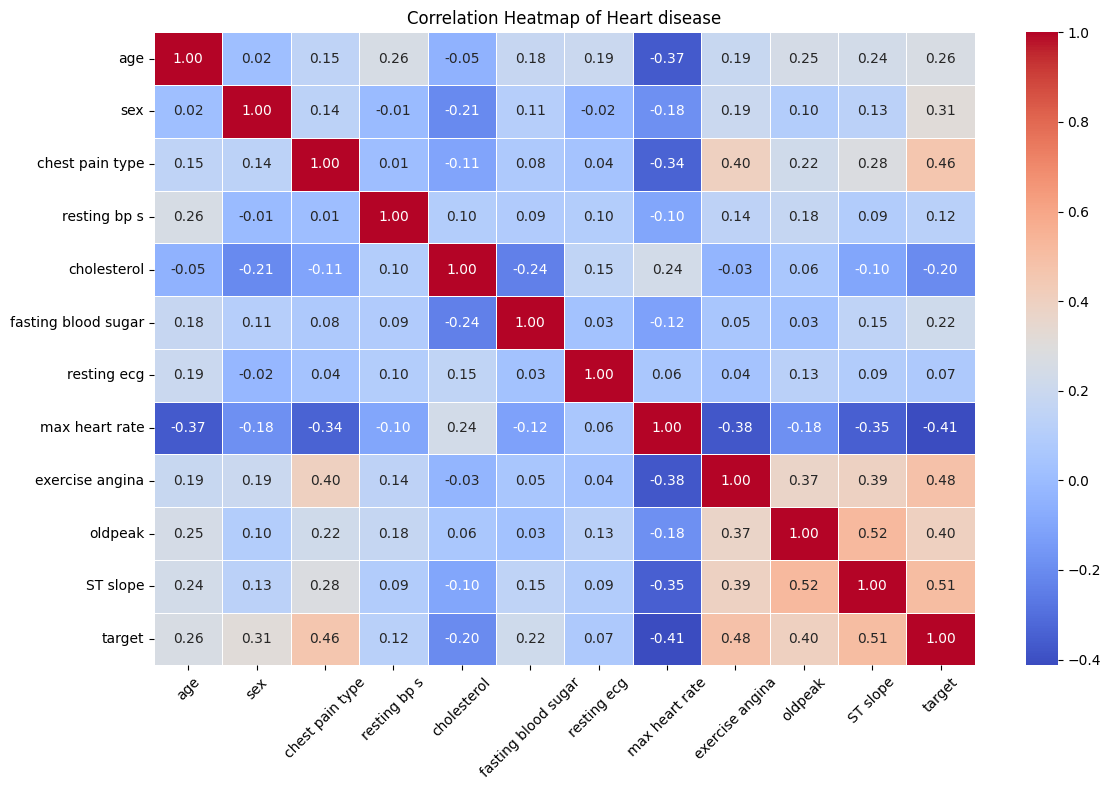

In [155]:
#correlation heat map
numerical_features = data.select_dtypes(include=['int64', 'float64'])

corr_matrix= numerical_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Heart disease")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Models

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [157]:
from xgboost import XGBClassifier

Split data into test and train

In [158]:
from sklearn.preprocessing import StandardScaler


# Drop target
X = data.drop('target', axis=1)
y = data['target']

# Optionally: if needed, convert all columns to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


In [159]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Store results
results = {}


In [160]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred, target_names=['No Disease', 'Has Disease']))

    # Save results
    results[name] = {
        "model": model,
        "y_pred": y_pred,
        "y_prob": y_prob
    }

=== Logistic Regression ===
              precision    recall  f1-score   support

  No Disease       0.84      0.82      0.83       112
 Has Disease       0.84      0.86      0.85       126

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238

=== Random Forest ===
              precision    recall  f1-score   support

  No Disease       0.91      0.92      0.92       112
 Has Disease       0.93      0.92      0.92       126

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238

=== SVM ===
              precision    recall  f1-score   support

  No Disease       0.90      0.84      0.87       112
 Has Disease       0.87      0.92      0.89       126

    accuracy                           0.88       238
   macro avg       0.88      0.88      0.88       238
weighted avg

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:35:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


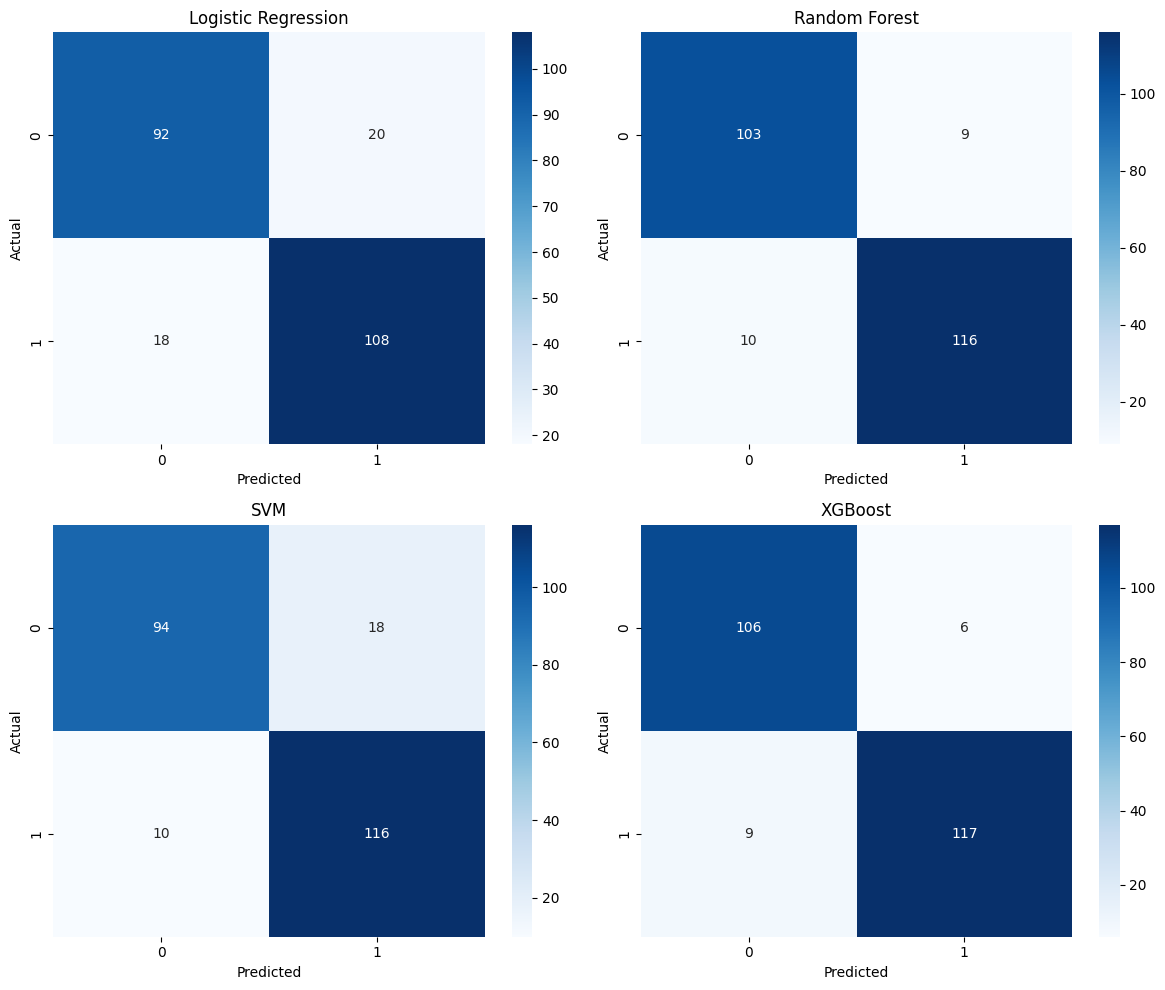

In [161]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, (name, res) in zip(axes, results.items()):
    cm = confusion_matrix(y_test, res['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


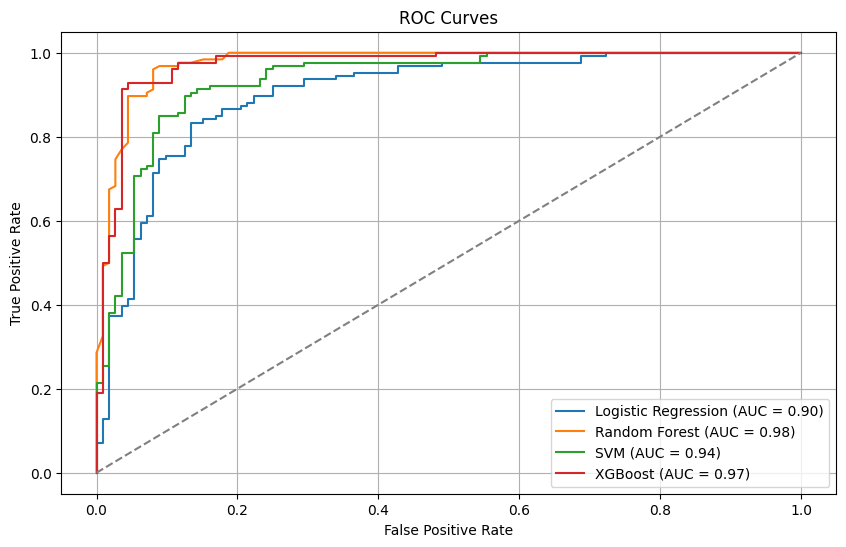

In [162]:
plt.figure(figsize=(10, 6))

for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_test, res['y_prob'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()

In [163]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

summary = []

for name, res in results.items():
    acc = accuracy_score(y_test, res['y_pred'])
    prec = precision_score(y_test, res['y_pred'])
    rec = recall_score(y_test, res['y_pred'])
    f1 = f1_score(y_test, res['y_pred'])
    summary.append([name, acc, prec, rec, f1])

summary_df = pd.DataFrame(summary, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
print(summary_df.sort_values(by='F1-Score', ascending=False))


                 Model  Accuracy  Precision    Recall  F1-Score
3              XGBoost  0.936975   0.951220  0.928571  0.939759
1        Random Forest  0.920168   0.928000  0.920635  0.924303
2                  SVM  0.882353   0.865672  0.920635  0.892308
0  Logistic Regression  0.840336   0.843750  0.857143  0.850394


In [164]:
import joblib

# Save the trained XGBoost model (replace 'XGBoost' if you want to save a different model)
joblib.dump(results['XGBoost']['model'], 'heart_disease_model.pkl')

print("XGBoost model saved as heart_disease_model.pkl")

XGBoost model saved as heart_disease_model.pkl


In [165]:
import streamlit as st
import joblib
import numpy as np

In [166]:
# Load trained model
model = joblib.load('heart_disease_model.pkl')


In [167]:
st.set_page_config(page_title="Heart Disease Predictor", layout="centered")
st.title(" Heart Disease Risk Predictor")
st.markdown("Enter your health data below to assess heart disease risk.")


2025-06-26 15:35:48.375 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.376 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.376 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.376 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [168]:
import streamlit as st
import joblib
import numpy as np

In [169]:
# Load trained model
model = joblib.load('heart_disease_model.pkl')


In [170]:
st.set_page_config(page_title="Heart Disease Predictor", layout="centered")
st.title(" Heart Disease Risk Predictor")
st.markdown("Enter your health data below to assess heart disease risk.")


2025-06-26 15:35:48.394 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.394 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.394 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.395 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.395 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.396 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.396 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [171]:
st.subheader("📊 Model Performance")
st.metric(label="Accuracy", value="92%", delta="+")

# Create columns for cleaner layout
col1, col2 = st.columns(2)


2025-06-26 15:35:48.401 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.402 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.402 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.403 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.403 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.405 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.405 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.406 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [172]:
'''with col2:
    fbs = st.selectbox("Fasting Blood Sugar > 120 mg/dl", options=[0, 1], help="1 = True; 0 = False")
    restecg = st.selectbox("Resting ECG Results", options=[0, 1, 2], help="0 = Normal, 1 = ST-T abnormality, 2 = Left ventricular hypertrophy")
    thalach = st.number_input("Max Heart Rate Achieved", min_value=60, max_value=220)
    exang = st.selectbox("Exercise Induced Angina", options=[0, 1], help="1 = Yes; 0 = No")
    oldpeak = st.number_input("ST Depression (Oldpeak)", min_value=0.0, max_value=10.0, step=0.1)'''


'with col2:\n    fbs = st.selectbox("Fasting Blood Sugar > 120 mg/dl", options=[0, 1], help="1 = True; 0 = False")\n    restecg = st.selectbox("Resting ECG Results", options=[0, 1, 2], help="0 = Normal, 1 = ST-T abnormality, 2 = Left ventricular hypertrophy")\n    thalach = st.number_input("Max Heart Rate Achieved", min_value=60, max_value=220)\n    exang = st.selectbox("Exercise Induced Angina", options=[0, 1], help="1 = Yes; 0 = No")\n    oldpeak = st.number_input("ST Depression (Oldpeak)", min_value=0.0, max_value=10.0, step=0.1)'

In [173]:
'''col3, col4 = st.columns(2)
with col3:
    slope = st.selectbox("Slope of Peak Exercise ST Segment", options=[1, 2, 3], help="1 = Upsloping, 2 = Flat, 3 = Downsloping")'''


'col3, col4 = st.columns(2)\nwith col3:\n    slope = st.selectbox("Slope of Peak Exercise ST Segment", options=[1, 2, 3], help="1 = Upsloping, 2 = Flat, 3 = Downsloping")'

In [174]:
# Prediction button
'''if st.button("🔍 Predict Risk"):
    input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])
    prediction = model.predict(input_data)[0]

    if prediction == 1:
        st.error("⚠️ High risk of heart disease detected!")
    else:
        st.success("✅ Low risk of heart disease.")

st.markdown("---")
st.caption("Built with ❤️ using Streamlit and XGBoost")'''

'if st.button("🔍 Predict Risk"):\n    input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])\n    prediction = model.predict(input_data)[0]\n\n    if prediction == 1:\n        st.error("⚠️ High risk of heart disease detected!")\n    else:\n        st.success("✅ Low risk of heart disease.")\n\nst.markdown("---")\nst.caption("Built with ❤️ using Streamlit and XGBoost")'

In [175]:
# Create a single column layout (full width)
col1 = st.columns(1)[0]

with col1:
    age = st.number_input("Age", min_value=1, max_value=120)
    sex = st.selectbox("Sex", options=[0, 1], help="1 = Male, 0 = Female")
    chest_pain = st.selectbox("Chest Pain Type", options=[1, 2, 3, 4], help="1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic")
    bp = st.number_input("Resting Blood Pressure", min_value=80, max_value=250)
    cholesterol = st.number_input("Serum Cholesterol (mg/dl)", min_value=100, max_value=600)
    fbs = st.selectbox("Fasting Blood Sugar > 120 mg/dl", options=[0, 1], help="1 = True; 0 = False")
    restecg = st.selectbox("Resting ECG Results", options=[0, 1, 2], help="0 = Normal, 1 = ST-T abnormality, 2 = Left ventricular hypertrophy")
    max_hr = st.number_input("Max Heart Rate Achieved", min_value=60, max_value=220)
    angina = st.selectbox("Exercise Induced Angina", options=[0, 1], help="1 = Yes; 0 = No")
    oldpeak = st.number_input("ST Depression (Oldpeak)", min_value=0.0, max_value=10.0, step=0.1)
    slope = st.selectbox("Slope of Peak Exercise ST Segment", options=[1, 2, 3], help="1 = Upsloping, 2 = Flat, 3 = Downsloping")
   

# Prediction button
if st.button("🔍 Predict Risk"):
    input_data = np.array([[age, sex, chest_pain, bp, cholesterol, fbs, restecg, max_hr, angina, oldpeak, slope]])
    prediction = model.predict(input_data)[0]

    if prediction == 1:
        st.error("⚠️ High risk of heart disease detected!")
    else:
        st.success("✅ Low risk of heart disease.")

st.markdown("---")
st.caption("Built with ❤️ using Streamlit and XGBoost - Dinuri Gamage ~ heart disease risk predictor")


2025-06-26 15:35:48.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.430 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.431 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.431 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.432 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.432 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 15:35:48.432 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [176]:
# Sidebar input
#age = st.slider("Age", 20, 90, 50)
#
#sex = st.selectbox("Sex", ["Female", "Male"])
#chest_pain = st.selectbox("Chest Pain Type", ["Typical Angina (1)", "Atypical (2)", "Non-anginal (3)", "Asymptomatic (4)"])
'''bp = st.slider("Resting Blood Pressure (mm Hg)", 80, 200, 120)
cholesterol = st.slider("Serum Cholesterol (mg/dl)", 100, 600, 200)
fbs = st.selectbox("Fasting Blood Sugar > 120 mg/dl", ["No (0)", "Yes (1)"])
rest_ecg = st.selectbox("Resting ECG Results", ["Normal (0)", "ST-T Abnormality (1)", "LV Hypertrophy (2)"])
max_hr = st.slider("Max Heart Rate", 60, 220, 150)
angina = st.selectbox("Exercise-Induced Angina", ["No (0)", "Yes (1)"])
oldpeak = st.slider("Oldpeak (ST depression)", 0.0, 6.5, 1.0, step=0.1)
slope = st.selectbox("ST Slope", ["Upsloping (1)", "Flat (2)", "Downsloping (3)"])'''

'bp = st.slider("Resting Blood Pressure (mm Hg)", 80, 200, 120)\ncholesterol = st.slider("Serum Cholesterol (mg/dl)", 100, 600, 200)\nfbs = st.selectbox("Fasting Blood Sugar > 120 mg/dl", ["No (0)", "Yes (1)"])\nrest_ecg = st.selectbox("Resting ECG Results", ["Normal (0)", "ST-T Abnormality (1)", "LV Hypertrophy (2)"])\nmax_hr = st.slider("Max Heart Rate", 60, 220, 150)\nangina = st.selectbox("Exercise-Induced Angina", ["No (0)", "Yes (1)"])\noldpeak = st.slider("Oldpeak (ST depression)", 0.0, 6.5, 1.0, step=0.1)\nslope = st.selectbox("ST Slope", ["Upsloping (1)", "Flat (2)", "Downsloping (3)"])'

In [177]:

'''# Convert categorical to numeric
sex = 1 if sex == "Male" else 0
chest_pain = int(chest_pain.split('(')[-1][0])
fbs = int(fbs.split('(')[-1][0])
rest_ecg = int(rest_ecg.split('(')[-1][0])
angina = int(angina.split('(')[-1][0])
slope = int(slope.split('(')[-1][0])'''


'# Convert categorical to numeric\nsex = 1 if sex == "Male" else 0\nchest_pain = int(chest_pain.split(\'(\')[-1][0])\nfbs = int(fbs.split(\'(\')[-1][0])\nrest_ecg = int(rest_ecg.split(\'(\')[-1][0])\nangina = int(angina.split(\'(\')[-1][0])\nslope = int(slope.split(\'(\')[-1][0])'

In [178]:
'''features = np.array([[age, sex, chest_pain, bp, cholesterol, fbs, rest_ecg, max_hr, angina, oldpeak, slope]])'''


'features = np.array([[age, sex, chest_pain, bp, cholesterol, fbs, rest_ecg, max_hr, angina, oldpeak, slope]])'

In [179]:
# Predict
'''if st.button("Predict Risk"):
    prediction = model.predict(features)[0]
    probability = model.predict_proba(features)[0][1]

    if prediction == 1:
        st.error(f" High Risk of Heart Disease\nProbability: {probability:.2f}")
        st.markdown("**Recommendation:** Please consult a cardiologist for further evaluation.")
    else:
        st.success(f"Low Risk of Heart Disease\nProbability: {1 - probability:.2f}")
        st.markdown("**Stay Healthy!** Keep monitoring your health regularly.")

st.markdown("---")
st.caption("Made by Dinuri Gamage | Data Science Project")'''


'if st.button("Predict Risk"):\n    prediction = model.predict(features)[0]\n    probability = model.predict_proba(features)[0][1]\n\n    if prediction == 1:\n        st.error(f" High Risk of Heart Disease\nProbability: {probability:.2f}")\n        st.markdown("**Recommendation:** Please consult a cardiologist for further evaluation.")\n    else:\n        st.success(f"Low Risk of Heart Disease\nProbability: {1 - probability:.2f}")\n        st.markdown("**Stay Healthy!** Keep monitoring your health regularly.")\n\nst.markdown("---")\nst.caption("Made by Dinuri Gamage | Data Science Project")'

In [180]:
get_ipython().system('streamlit run app.py')


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://192.168.1.101:8502

  For better performance, install the Watchdog module:

  $ xcode-select --install
  $ pip install watchdog
            
────────────────────────── Traceback (most recent call last) ───────────────────────────
  /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/stre  
  amlit/runtime/scriptrunner/exec_code.py:128 in exec_func_with_error_handling          
                                                                                        
  /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/stre  
  amlit/runtime/scriptrunner/script_runner.py:669 in code_to_exec                       
                                                                                        
  /Users/dinurinijai/Downloads/app.py:37 in <module>                                    
                                 